#### We load a dataset  using pandas library and apply couple of Algorithms and find the best one among them in terms of accuracy and evaluation

In [1]:

import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import preprocessing


In [2]:
df=pd.read_csv('C:/Users/batmanTheEngineer/Downloads/Loan-best-Classifier-master/Loan-best-Classifier-master/loan_train.csv')

### Load Data from Loan CSV file

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to data time object

In [5]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

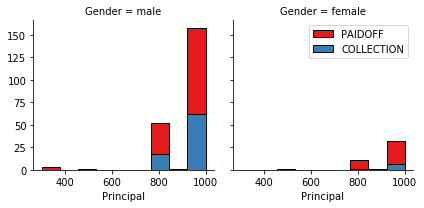

In [7]:

import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Preprocessing: Feature Selection / Extraction

#### Looking at the day of the week people get approved of the loan

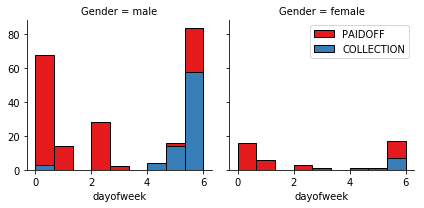

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

#### We see that there is a massive collection rates who gets their loan approved at the end of week so,using a feature binarization to set a threshold value less than day 4

In [9]:

df['weekend']=df['dayofweek'].apply(lambda x:1 if (x>3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Data Visualization and Preprocessing

In [85]:

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

######  As we can see 86% of female  i.e 45  had paid the loan while 13% i.e 7 had gone into collection

#### Similarly 73% i.e 215 of males had paid the loan while 26% i.e 79 of them gone for collection

### Lets plot some columns to understand data better 

In [11]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)


In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding 

### converting education column also in binary

In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame df

In [15]:
Feature=df[['Principal','terms','age','Gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.drop(["Master or Above"],axis=1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection

#### Let us define feuture sets,X:

In [16]:
X=Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


#### what are our labels?

In [17]:
y=df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data

#### Data Standardization gives data zero mean and unit variance

In [18]:

X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\batmanTheEngineer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\batmanTheEngineer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

## Classification

#### Using the training set to build accurate model,then use the test set to report the accuracy of the model using following algorithms

#### 1.K Nearest Neighbor(KNN)
#### 2.Decision Tree
#### 3.Support Vector Machine
#### 4.Logistic Regression

## K Nearest Neighbor(KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [24]:
seed=50
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=seed)

In [21]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.7285714285714285
2 :  0.6714285714285714
3 :  0.7714285714285715
4 :  0.7285714285714285
5 :  0.7571428571428571
6 :  0.7428571428571429
7 :  0.8142857142857143
8 :  0.8
9 :  0.8
10 :  0.8142857142857143
11 :  0.8285714285714286
12 :  0.8285714285714286
13 :  0.8285714285714286
14 :  0.8285714285714286
15 :  0.8
16 :  0.8142857142857143
17 :  0.8142857142857143
18 :  0.8
19 :  0.8285714285714286
20 :  0.7714285714285715
21 :  0.8285714285714286
22 :  0.8142857142857143
23 :  0.8
24 :  0.8
25 :  0.7857142857142857
26 :  0.7857142857142857
27 :  0.7857142857142857
28 :  0.7857142857142857
29 :  0.7857142857142857
30 :  0.7857142857142857
31 :  0.7857142857142857
32 :  0.7857142857142857
33 :  0.7857142857142857
34 :  0.7857142857142857
35 :  0.7857142857142857
36 :  0.7857142857142857
37 :  0.7857142857142857
38 :  0.7857142857142857
39 :  0.7857142857142857
40 :  0.7857142857142857
41 :  0.7857142857142857
42 :  0.7714285714285715
43 :  0.8142857142857143
44 :  0.8142857142857143

In [22]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')

11  :  82.86 %


Text(0, 0.5, 'Train Accuracy')

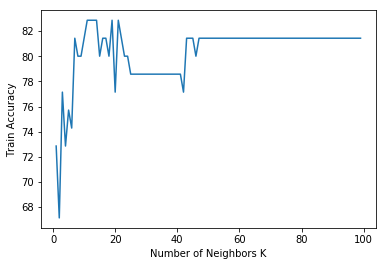

In [23]:

plt.plot(range(1,100),score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')

In [25]:
knn=KNeighborsClassifier(n_neighbors=41,weights='uniform')
knn.fit(X_train,y_train)
predKNN=knn.predict(X_test)
accuracy=metrics.accuracy_score(predKNN,y_test)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  83.5 %


In [26]:
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score
print(classification_report(y_test,predKNN))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,predKNN)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,predKNN,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, knn.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.67      0.16      0.26        25
     PAIDOFF       0.84      0.98      0.91       114

   micro avg       0.83      0.83      0.83       139
   macro avg       0.75      0.57      0.58       139
weighted avg       0.81      0.83      0.79       139



Jaccard Similarity Score :  83.45 %


F1-SCORE :  [0.25806452 0.90688259]


Train Accuracy:  72.46376811594203 %


# Decision Tree

In [30]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier()

In [31]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,5,9,15,20],
                  'max_features': [1, 2, 3, 4,5,6,7,8],
                 'random_state':[0,15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dtree, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7439613526570048
Best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 2, 'random_state': 0}


C:\Users\batmanTheEngineer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
dtree=DecisionTreeClassifier(max_depth=5,criterion='entropy',max_features=2,random_state=0)

In [33]:

dtree.fit(X_train,y_train)
pred_Dtree=dtree.predict(X_test)

In [34]:
print(classification_report(y_test,pred_Dtree))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_Dtree)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_Dtree,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, dtree.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.32      0.40      0.36        25
     PAIDOFF       0.86      0.82      0.84       114

   micro avg       0.74      0.74      0.74       139
   macro avg       0.59      0.61      0.60       139
weighted avg       0.76      0.74      0.75       139



Jaccard Similarity Score :  74.1 %


F1-SCORE :  [0.35714286 0.83783784]


Train Accuracy:  77.29468599033817 %


# Support Vector Machine

In [35]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [36]:
svm=SVC().fit(X_train,y_train)

C:\Users\batmanTheEngineer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
pred_svm=svm.predict(X_test)

In [38]:
print(classification_report(y_test,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, svm.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.33      0.24      0.28        25
     PAIDOFF       0.84      0.89      0.87       114

   micro avg       0.78      0.78      0.78       139
   macro avg       0.59      0.57      0.57       139
weighted avg       0.75      0.78      0.76       139



Jaccard Similarity Score :  77.7 %


F1-SCORE :  [0.27906977 0.86808511]


Train Accuracy:  75.84541062801932 %


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lgm=LogisticRegression()

In [52]:
lgm.fit(X_train,y_train)


C:\Users\batmanTheEngineer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
pred_lgm=lgm.predict(X_test)

In [54]:
print(classification_report(y_test,pred_lgm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_lgm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_lgm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, lgm.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.33      0.24      0.28        25
     PAIDOFF       0.84      0.89      0.87       114

   micro avg       0.78      0.78      0.78       139
   macro avg       0.59      0.57      0.57       139
weighted avg       0.75      0.78      0.76       139



Jaccard Similarity Score :  77.7 %


F1-SCORE :  [0.27906977 0.86808511]


Train Accuracy:  73.91304347826086 %


# Model Evaluation using test set

In [55]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


### Loading test set for evaluation

In [56]:
test_df = pd.read_csv('C:/Users/batmanTheEngineer/Downloads/Loan-best-Classifier-master/Loan-best-Classifier-master/loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [57]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [58]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


In [59]:
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)

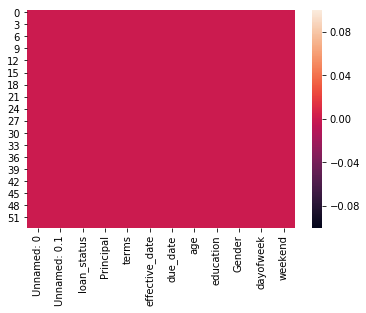

In [60]:
sns.heatmap(test_df.isnull())

In [61]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [62]:
dumm=pd.get_dummies(test_df['education'])
#dumm=dumm.drop('Master or Above',axis=1,inplace=True)
dumm=dumm[['Bechalor','High School or Below','college']]

In [63]:
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,dumm], axis=1)
#test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [64]:
test_data= test_feature
test_data= preprocessing.StandardScaler().fit(test_data).transform(test_data)

C:\Users\batmanTheEngineer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\batmanTheEngineer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [65]:
y_t=test_df['loan_status']

## Using Train data for training model,and Test data for testing model

# KNN

In [66]:
knn=KNeighborsClassifier()
knn.fit(X,y)
predKNN_test=knn.predict(test_data)
accuracy=metrics.accuracy_score(predKNN_test,y_t)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  74.1 %


### Best K for Test data

In [67]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X,y)
    predKNN=knn.predict(test_data)
    accuracy=metrics.accuracy_score(predKNN,y_t)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.7037037037037037
2 :  0.5740740740740741
3 :  0.6481481481481481
4 :  0.6296296296296297
5 :  0.7407407407407407
6 :  0.6851851851851852
7 :  0.7222222222222222
8 :  0.7037037037037037
9 :  0.7037037037037037
10 :  0.6851851851851852
11 :  0.6851851851851852
12 :  0.6666666666666666
13 :  0.7037037037037037
14 :  0.7037037037037037
15 :  0.7222222222222222
16 :  0.7037037037037037
17 :  0.7222222222222222
18 :  0.7037037037037037
19 :  0.7222222222222222
20 :  0.7407407407407407
21 :  0.7592592592592593
22 :  0.7592592592592593
23 :  0.7592592592592593
24 :  0.7222222222222222
25 :  0.7407407407407407
26 :  0.7777777777777778
27 :  0.7592592592592593
28 :  0.7777777777777778
29 :  0.7592592592592593
30 :  0.7777777777777778
31 :  0.7407407407407407
32 :  0.7962962962962963
33 :  0.7777777777777778
34 :  0.7962962962962963
35 :  0.7962962962962963
36 :  0.7777777777777778
37 :  0.7962962962962963
38 :  0.7962962962962963
39 :  0.7962962962962963
40 :  0.7962962962962963
41 :  0.7

In [68]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')

32  :  79.63 %


In [69]:

knn=KNeighborsClassifier(n_neighbors=32)
knn.fit(X,y)
predKNN_test=knn.predict(test_data)
accuracy=metrics.accuracy_score(predKNN_test,y_t)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  79.60000000000001 %


In [70]:
print(classification_report(y_t,predKNN_test))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,predKNN_test)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,predKNN_test,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y,knn.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.71      0.36      0.48        14
     PAIDOFF       0.81      0.95      0.87        40

   micro avg       0.80      0.80      0.80        54
   macro avg       0.76      0.65      0.67        54
weighted avg       0.78      0.80      0.77        54



Jaccard Similarity Score :  79.63 %


F1-SCORE :  [0.47619048 0.87356322]


Train Accuracy:  74.85549132947978 %


# Decision Tree

In [71]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,5,9,15,20],
                  'max_features': [1, 2, 3, 4,5,6,7,8],
                 'random_state':[0,15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dtree, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X, y)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7687861271676301
Best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 4, 'random_state': 20}


C:\Users\batmanTheEngineer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
dtree=DecisionTreeClassifier(max_depth=6,criterion='entropy',max_features=4,random_state=20).fit(X,y)
pred_Dtree=dtree.predict(test_data)

In [74]:
print(classification_report(y_t,pred_Dtree))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_Dtree)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_Dtree,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, dtree.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.44      0.29      0.35        14
     PAIDOFF       0.78      0.88      0.82        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54



Jaccard Similarity Score :  72.22 %


F1-SCORE :  [0.34782609 0.82352941]


Train Accuracy:  79.47976878612717 %


# SVM

In [75]:
svm=SVC().fit(X,y)
pred_svm=svm.predict(test_data)

In [76]:
print(classification_report(y_t,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, svm.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      0.97      0.84        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.37      0.49      0.42        54
weighted avg       0.55      0.72      0.62        54



Jaccard Similarity Score :  72.22 %


F1-SCORE :  [0.         0.83870968]


Train Accuracy:  76.01156069364163 %


# Logistic Regression

In [77]:
lgm=LogisticRegression().fit(X,y)

C:\Users\batmanTheEngineer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
pred_lgm=lgm.predict(test_data)

In [79]:
print(classification_report(y_t,pred_lgm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_lgm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_lgm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, lgm.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54



Jaccard Similarity Score :  75.93 %


F1-SCORE :  [0.13333333 0.86021505]


Train Accuracy:  75.43352601156069 %


In [80]:
Algoritm=['KNN','Decision Tree','SVM','LogisticRegression']
j_knn=round(jaccard_similarity_score(y_t,predKNN_test)*100,2)
j_dtree=round(jaccard_similarity_score(y_t,pred_Dtree)*100,2)
j_svm=round(jaccard_similarity_score(y_t,pred_svm)*100,2)
j_lgm=round(jaccard_similarity_score(y_t,pred_lgm)*100,2)
Jaccard=[j_knn,j_dtree,j_svm,j_lgm]

f1_knn=f1_score(y_t,predKNN_test,average=None)
f1_dtree=f1_score(y_t,pred_Dtree,average=None)
f1_svm=f1_score(y_t,pred_svm,average=None)
f1_lgm=f1_score(y_t,pred_lgm,average=None)
F1_score=[f1_knn,f1_dtree,f1_svm,f1_lgm]

In [81]:
table = pd.DataFrame({
    "Algorithm": Algoritm,
    "Jaccard": Jaccard,
    "F1-Score": F1_score,
    "LogLoss":[np.NAN,np.NAN,np.NAN,np.NAN]})

In [82]:
table

,Algorithm,Jaccard,F1-Score,LogLoss
0,KNN,79.63,"[0.4761904761904762, 0.8735632183908046]",NaN
1,Decision Tree,72.22,"[0.34782608695652173, 0.823529411764706]",NaN
2,SVM,72.22,"[0.0, 0.8387096774193549]",NaN
3,LogisticRegression,75.93,"[0.13333333333333333, 0.8602150537634409]",NaN
